In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.debugging.set_log_device_placement(False)

In [4]:

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
train_images.shape

(60000, 28, 28)

 
1) Thus we see that training dataset has 60000 images (rows) each of size (28,28) or 28x28 i.e. 2-D images, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

2) Since a convolutional layer takes a 2-D image (2-D array) as input, we needn't convert these 2-D images to a 1-D arrays

3) If we had to feed these 2-D images to a DNN (hidden layer), which expects a 1-D array as input, we would have to convert these 2-D iamges to 1-D arrays before feeding to hidden layer (DNN)

In [8]:
print("Train shape {}, test shape {}".format(train_labels.shape,test_labels.shape))

Train shape (60000,), test shape (10000,)


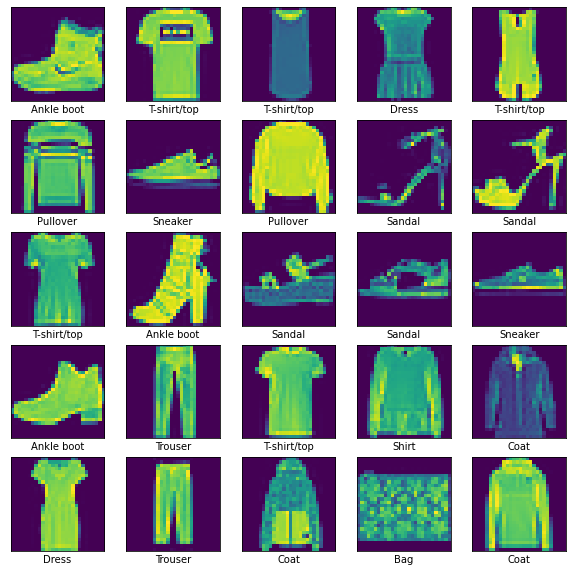

In [9]:
# plt.figure()
# plt.imshow(np.squeeze(train_images[220]))
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
train_labels[220]

8

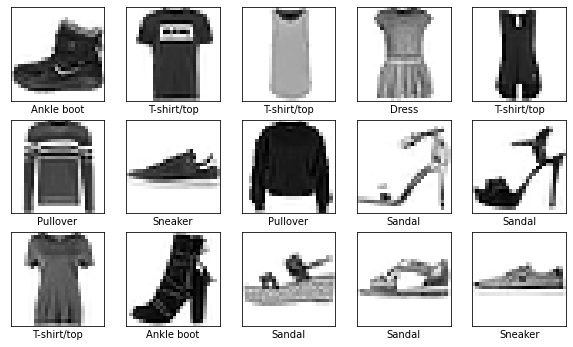

In [11]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
# First convolutional layer. 
# Number of neurons = 16
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1

conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) ) 

In [15]:
# Second convolutional layer. 
# Number of neurons = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv1 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv2 = layers.Conv2D(64, (3,3), activation='relu')## 64

In [16]:
# Second convolutional layer. 
# Number of neurons = 64
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv2 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv3 = layers.Conv2D(128, (3,3), activation='relu')## 128
conv4 = layers.Conv2D(64, (3,3), activation='relu')

In [17]:
# Max Pool Layer
# Since input to CNN is a 2-D image and ouput from last convolutional layer (featuerMap) is also 2-D array 
# (except the third dimension i.e. channels), we will use 2D version of Max Pooling function of TensorFlow Keras
# to create a Max Pooling Layer, as shown below filter (kernel) size for Pooling Layer = 2x2

#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

# conv3 = layers.Conv2D(128, (3,3), activation='relu')

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))
# conv4 = layers.Conv2D(128, (3,3), activation='relu')

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))
# conv5 = layers.Conv2D(128, (3,3), activation='relu')

In [18]:
# Fully Connected (FC) Layer i.e. hidden layer expects input in 1-D format (1-D array), hence, we need to convert
# 2-D output (2-D array) of last convolutional layer (conv3) to 1-D array i.e. we need to flatten the 2-D array
# to 1-D array

flat_layer = layers.Flatten()

In [19]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer

fc = layers.Dense(128, activation='relu')

In [20]:
## add more layers


fc1=layers.Dense(128, activation='relu')
fc2=layers.Dense(128, activation = 'softmax')

In [21]:
# Output Layer - with 10 neurons (as we have 10 output classes) and using 'softmax' function

output = layers.Dense(10, 'softmax')

In [22]:
# TensorFlow Keras uses Keras Sequential API

model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(max_pool_1)
model.add(conv3)
# model.add(conv4)
model.add(max_pool_2)

model.add(flat_layer)
model.add(fc)
model.add(output)

In [23]:
# Let us see what all layers our model has

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0

Let us now specify the optimizer(adam), loss function(crossentropy) and metrics(accuracy) for this model

NOTE: Use sparse categorical crossentropy when your classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and categorical crossentropy when one sample can have multiple classes or labels are soft probabilities (like [0.5, 0.3, 0.2]).

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now let us train the model and also perform the cross validation 
and hyperparameter tuning. Passing validation_split parameter to fit() method ensures that cross validation and hyperparameter tuning also happens during the training.

In [26]:
# we are using the normalized input data

history =  model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))


Epoch 1/10
1875/1875 [==============================] - 47s 6ms/step - loss: 0.3976 - accuracy: 0.8556 - val_loss: 0.3055 - val_accuracy: 0.8888
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2485 - accuracy: 0.9099 - val_loss: 0.2430 - val_accuracy: 0.9108
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2020 - accuracy: 0.9264 - val_loss: 0.2390 - val_accuracy: 0.9124
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1699 - accuracy: 0.9368 - val_loss: 0.2357 - val_accuracy: 0.9151
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1421 - accuracy: 0.9478 - val_loss: 0.2217 - val_accuracy: 0.9190
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1146 - accuracy: 0.9572 - val_loss: 0.2219 - val_accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0959 - accuracy: 0.9642 - val_loss: 0.2418 - val_ac

In [27]:
y_pred=model.predict(test_images)
y_pred = y_pred
# calculate accuracy
y_pred_labels=[np.argmax(i) for i in y_pred]
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_labels,test_labels)

0.9219

## Check prediciton images

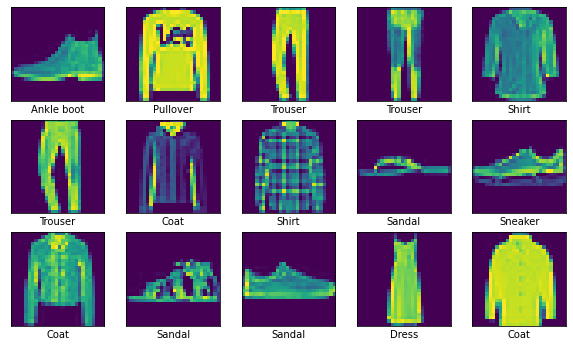

In [28]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel(class_names[y_pred_labels[i]])
plt.show()

In [30]:
# we are using the normalized input data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
y_pred=model.predict(test_images)
y_pred.shape

313/313 [==============================] - 2s 5ms/step - loss: 0.3162 - accuracy: 0.9219


(10000, 10)

In [37]:
test_loss

0.3162340223789215

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels,y_pred_labels)

In [32]:
cm

array([[848,   0,  12,  13,   1,   1, 118,   0,   7,   0],
       [  2, 988,   0,   7,   1,   0,   0,   0,   2,   0],
       [ 13,   0, 837,   5,  78,   0,  65,   0,   2,   0],
       [  8,   2,   6, 938,  22,   0,  22,   0,   2,   0],
       [  0,   0,  13,  22, 906,   0,  57,   0,   2,   0],
       [  0,   0,   0,   0,   0, 983,   0,  11,   1,   5],
       [ 76,   0,  39,  19,  53,   0, 803,   0,  10,   0],
       [  0,   0,   0,   0,   0,   7,   0, 948,   0,  45],
       [  1,   0,   2,   3,   3,   1,   7,   0, 983,   0],
       [  0,   0,   1,   0,   0,   3,   0,  11,   0, 985]], dtype=int64)

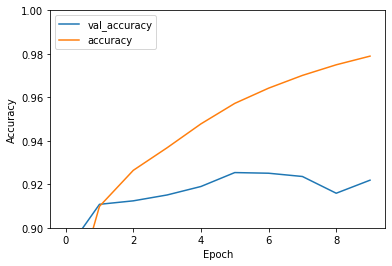

In [33]:
## plot accuracy and val-accuracy vs Epoch

plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9,1])
plt.legend(loc='upper left')

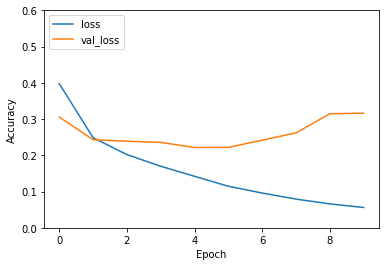

In [34]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,0.6])
plt.legend(loc='upper left')

In [35]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_pred_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.85      0.87      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.92      0.84      0.88      1000
       Dress       0.93      0.94      0.93      1000
        Coat       0.85      0.91      0.88      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.75      0.80      0.78      1000
     Sneaker       0.98      0.95      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.95      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [36]:
print(test_accuracy)

0.9218999743461609


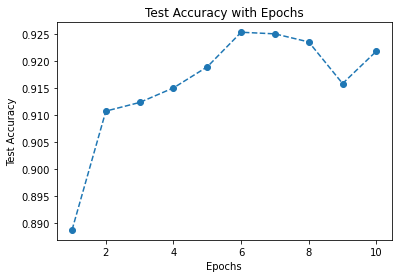

In [55]:
epochs= list(range(1,11))
valAcc= history.history['val_accuracy']
dict_d={e:acc for e,acc in zip(epochs,valAcc)}
import pandas as pd
df=pd.DataFrame({"Epochs":dict_d.keys(),"TestAccuracy":dict_d.values()})
plt.scatter(df.Epochs,df.TestAccuracy)
plt.plot(df.Epochs, df.TestAccuracy,'--')
plt.title("Test Accuracy with Epochs")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.show()
